This jupyter notebook demonstrates two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

In [1]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats 

# Import the course datasets as DataFrames
grains = pd.read_csv('../datasets/grains.csv')
fish = pd.read_csv('../datasets/fish.csv', header=None)
wine = pd.read_csv('../datasets/wine.csv')
eurovision = pd.read_csv('../datasets/eurovision-2016.csv')
stocks = pd.read_csv('../datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
digits = pd.read_csv('../datasets/lcd-digits.csv', header=None)

# Visualizing hierarchies



### Hierarchical clustering of the grain data

The SciPy ```linkage()``` function performs hierarchical clustering on an array of samples. Use the ```linkage()``` function to obtain a hierarchical clustering of the grain samples, and use ```dendrogram()``` to visualize the result. A sample of the grain measurements is provided in the array ```samples```, while the variety of each grain sample is given by the list ```varieties```.

[scipy.cluster.hierarchy.linkage Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

[scipy.cluster.hierarchy.dendrogram Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

In [2]:
varieties = grains.variety.values
samples = grains.drop(['variety_number', 'variety'], axis='columns').values

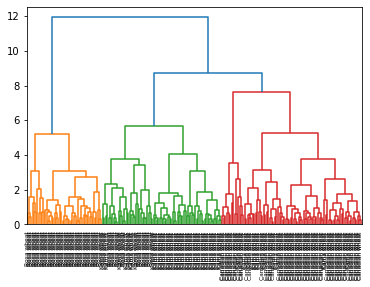

In [3]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


### Hierarchies of stocks

perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
movements = stocks.values
companies = stocks.index.values

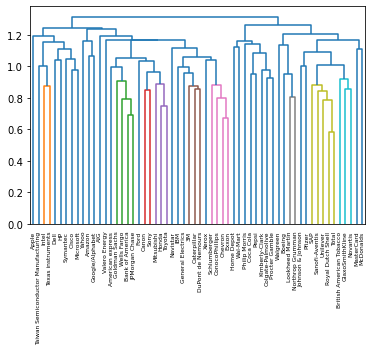

In [5]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6
           )
plt.show()


# Cluster labels in hierarchical clustering

### Different linkage, different hierarchical clustering!

Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

In the given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country.

In [6]:
samples = eurovision.drop(['From country', 'To country', 'Jury Points', 'Televote Points'], axis='columns').values
country_names = eurovision['From country'].values

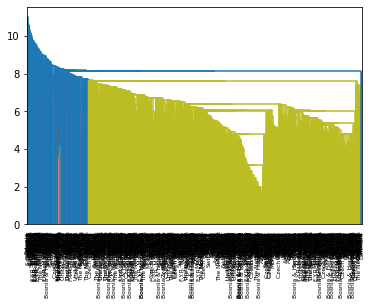

In [7]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6
           )
plt.show()


### Extracting the cluster labels

n the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

[scipy.cluster.hierarchy.fcluster Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)

In [24]:
varieties = grains.variety.values
variety_numbers = grains.variety_number.values
samples = grains.drop(['variety_number', 'variety'], axis='columns').values

# imports
from scipy.cluster.hierarchy import linkage

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

In [25]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings,6 ,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


# t-SNE for 2-dimensional maps

### t-SNE visualization of grain dataset

In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

[sklearn.manifold.TSNE Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

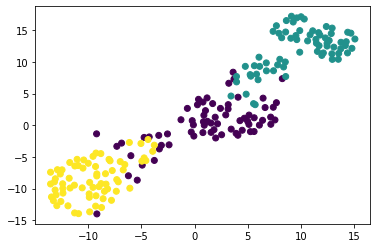

In [26]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()


### A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements 

In [34]:
movements = stocks.values
companies = stocks.index.values
# Import Normalizer
from sklearn.preprocessing import Normalizer

# The Normalizer will separately transform each company's stock price to a relative scale.

# Create a normalizer: normalizer
normalizer = Normalizer()
normalized_movements = normalizer.transform(movements)

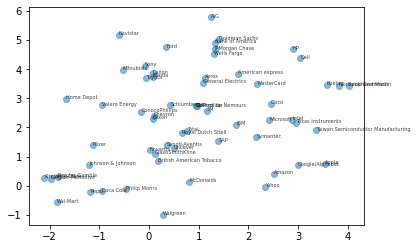

In [35]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
